**1. Business Understanding**

In any analytical project, the business understanding phase is crucial. This is where we define the problem, clarify the objectives, and understand the potential benefits of the analysis.

**Problem Definition:**
The primary challenge faced by many online platforms, including the Thread app, is the presence of fraudulent or spammy reviews. These reviews can skew the perception of the app, misleading potential users, and affecting the app's reputation. Detecting and mitigating such reviews can significantly enhance the user experience and maintain the platform's credibility.

**2. Data Understanding**

In this phase, we'll dive into the dataset to understand its structure, attributes, and potential issues. We'll focus on the following tasks:

1. Load the dataset.
2. Examine the first few rows to get a feel for the data.
3. Check for missing values.
4. Examine data types.
5. Get basic statistics.
6. Visualize distributions.

In [ ]:
import pandas as pd

# Load the dataset
threads_reviews_df = pd.read_csv('threads_reviews.csv')

# Display the first few rows of the dataset
threads_reviews_df.head()

,source,review_description,rating,review_date
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,Google Play,Best app,5,27-08-2023 9:47
3,Google Play,Gatiya app,1,27-08-2023 9:13
4,Google Play,Lit bruv,5,27-08-2023 9:00


In [ ]:
# Check for missing values
missing_values = threads_reviews_df.isnull().sum()

# Check data types
data_types = threads_reviews_df.dtypes

# Get basic statistics
basic_stats = threads_reviews_df.describe(include='all')

missing_values, data_types, basic_stats

(source                0
 review_description    0
 rating                0
 review_date           0
 dtype: int64,
 source                object
 review_description    object
 rating                 int64
 review_date           object
 dtype: object,
              source review_description        rating       review_date
 count         40435              40435  40435.000000             40435
 unique            2              32894           NaN             16742
 top     Google Play               Good           NaN  06-07-2023 16:43
 freq          36687                939           NaN                22
 mean            NaN                NaN      3.300532               NaN
 std             NaN                NaN      1.773157               NaN
 min             NaN                NaN      1.000000               NaN
 25%             NaN                NaN      1.000000               NaN
 50%             NaN                NaN      4.000000               NaN
 75%             NaN         

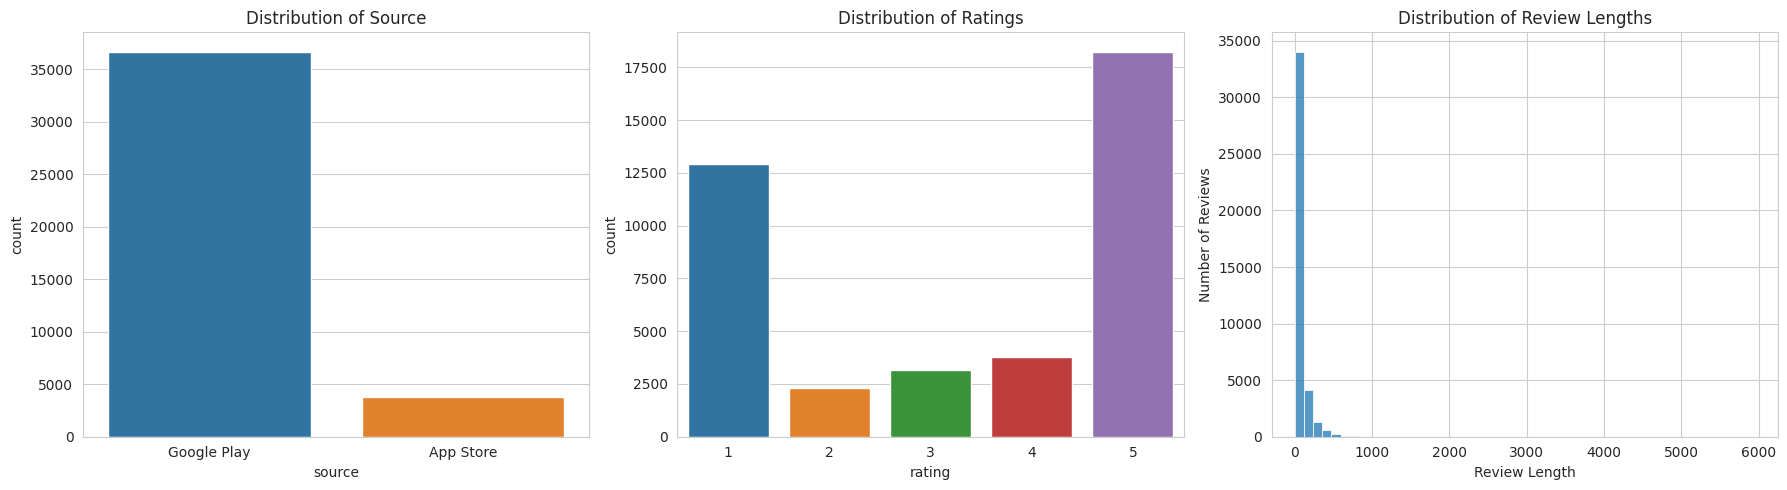

In [ ]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 5))

# Plot the distribution of the source
plt.subplot(1, 3, 1)
sns.countplot(data=threads_reviews_df, x='source')
plt.title('Distribution of Source')

# Plot the distribution of ratings
plt.subplot(1, 3, 2)
sns.countplot(data=threads_reviews_df, x='rating')
plt.title('Distribution of Ratings')

# Plot the distribution of review lengths
plt.subplot(1, 3, 3)
review_lengths = threads_reviews_df['review_description'].apply(len)
sns.histplot(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

# Display the plots
plt.tight_layout()
plt.show()


**3. Data Preparation**

Let's start by converting the review_date column to a datetime format and extracting useful features from it.


In [ ]:
# Convert 'review_date' to datetime format
threads_reviews_df['review_date'] = pd.to_datetime(threads_reviews_df['review_date'], format='%d-%m-%Y %H:%M')

# Extract features from 'review_date'
threads_reviews_df['hour'] = threads_reviews_df['review_date'].dt.hour
threads_reviews_df['day_of_week'] = threads_reviews_df['review_date'].dt.dayofweek
threads_reviews_df['day'] = threads_reviews_df['review_date'].dt.day
threads_reviews_df['month'] = threads_reviews_df['review_date'].dt.month

# Drop the original 'review_date' column
threads_reviews_df.drop('review_date', axis=1, inplace=True)

# Display the first few rows of the modified dataset
threads_reviews_df.head()


,source,review_description,rating,hour,day_of_week,day,month
0,Google Play,Very good app for Android phone and me,5,10,6,27,8
1,Google Play,Sl👍👍👍👍,5,10,6,27,8
2,Google Play,Best app,5,9,6,27,8
3,Google Play,Gatiya app,1,9,6,27,8
4,Google Play,Lit bruv,5,9,6,27,8


In [ ]:
# Let's proceed with one-hot encoding the source column.

# One-hot encode the 'source' column
encoded_source = pd.get_dummies(threads_reviews_df['source'], drop_first=True)
threads_reviews_df = pd.concat([threads_reviews_df, encoded_source], axis=1)

# Drop the original 'source' column
threads_reviews_df.drop('source', axis=1, inplace=True)

# Create a feature for the length of 'review_description'
threads_reviews_df['review_length'] = threads_reviews_df['review_description'].apply(len)

# Display the first few rows of the modified dataset
threads_reviews_df.head()

,review_description,rating,hour,day_of_week,day,month,Google Play,review_length
0,Very good app for Android phone and me,5,10,6,27,8,1,38
1,Sl👍👍👍👍,5,10,6,27,8,1,6
2,Best app,5,9,6,27,8,1,8
3,Gatiya app,1,9,6,27,8,1,10
4,Lit bruv,5,9,6,27,8,1,8


In [ ]:
# Let's proceed with normalization and scaling.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# List of numerical columns to scale
num_columns = ['hour', 'day_of_week', 'day', 'month', 'review_length']

# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
threads_reviews_df[num_columns] = scaler.fit_transform(threads_reviews_df[num_columns])

# Split the data into training and test sets
X = threads_reviews_df.drop('review_description', axis=1)
y = threads_reviews_df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the transformed dataset
X_train.head()

,rating,hour,day_of_week,day,month,Google Play,review_length
34855,2,-1.006920,-0.261514,-0.674991,-0.287498,1,0.200194
21179,4,0.263978,0.377263,-0.501937,-0.287498,1,-0.484416
4638,1,0.740565,1.654815,2.266912,-0.287498,1,-0.552876
32800,5,-0.371471,-0.261514,-0.674991,-0.287498,1,0.043712
13626,4,0.263978,1.654815,-0.155831,-0.287498,1,0.972825


**4. Modelling**

In the Modeling phase, our goal is to apply various techniques and algorithms to meet the business objectives. Let's start with Feature Selection.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df


,Feature,Importance
0,rating,1.0
1,hour,0.0
2,day_of_week,0.0
3,day,0.0
4,month,0.0
5,Google Play,0.0
6,review_length,0.0


Given this result, for regression modeling, using the rating as a feature to predict itself wouldn't be meaningful. Instead, we should consider a different approach, such as clustering or classification, where we try to predict whether a review is fraudulent or not based on other features. Alright, let's delve into Clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

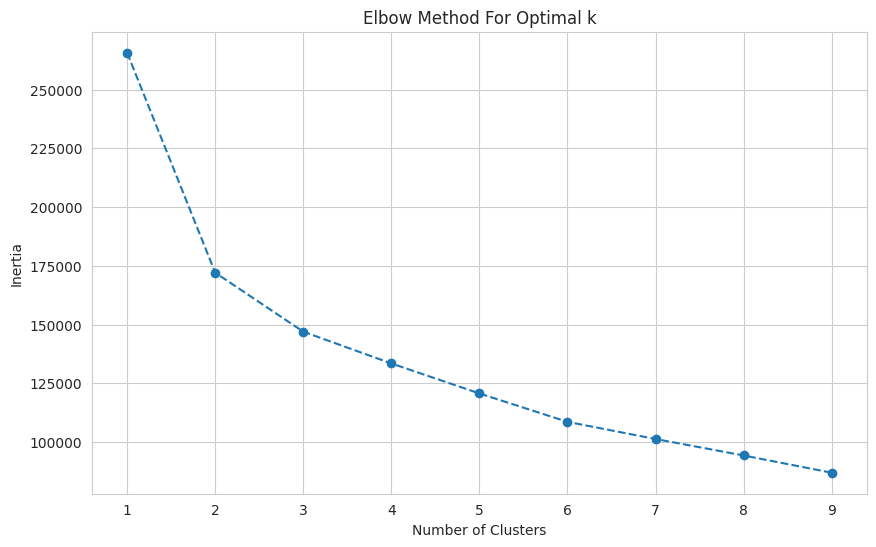

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
clusters_range = range(1, 10)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [ ]:
# Re-importing necessary libraries and re-loading the dataset

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
threads_reviews_df = pd.read_csv('threads_reviews.csv')

# Convert 'review_date' to datetime format
threads_reviews_df['review_date'] = pd.to_datetime(threads_reviews_df['review_date'], format='%d-%m-%Y %H:%M')

# Extract features from 'review_date'
threads_reviews_df['hour'] = threads_reviews_df['review_date'].dt.hour
threads_reviews_df['day_of_week'] = threads_reviews_df['review_date'].dt.dayofweek
threads_reviews_df['day'] = threads_reviews_df['review_date'].dt.day
threads_reviews_df['month'] = threads_reviews_df['review_date'].dt.month
threads_reviews_df.drop('review_date', axis=1, inplace=True)

# One-hot encode the 'source' column
encoded_source = pd.get_dummies(threads_reviews_df['source'], drop_first=True)
threads_reviews_df = pd.concat([threads_reviews_df, encoded_source], axis=1)
threads_reviews_df.drop('source', axis=1, inplace=True)

# Create a feature for the length of 'review_description'
threads_reviews_df['review_length'] = threads_reviews_df['review_description'].apply(len)

# Normalize and scale
num_columns = ['hour', 'day_of_week', 'day', 'month', 'review_length']
scaler = StandardScaler()
threads_reviews_df[num_columns] = scaler.fit_transform(threads_reviews_df[num_columns])

# Split data into training and test sets
X = threads_reviews_df.drop('review_description', axis=1)
y = threads_reviews_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KMeans with 3 clusters again
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Add the cluster labels to the X_train DataFrame for analysis
X_train['cluster'] = clusters

# Get the mean values of features for each cluster
cluster_means = X_train.groupby('cluster').mean().reset_index()

cluster_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,rating,hour,day_of_week,day,month,Google Play,review_length
0,0,4.705793,-0.036235,0.012761,-0.224924,-0.287498,0.930868,-0.214570
1,1,2.797546,0.019415,-0.206388,0.451801,3.478287,0.902658,-0.001297
2,2,1.337397,0.055128,0.023410,0.230702,-0.287498,0.876442,0.306534


Let's apply the Isolation Forest algorithm to detect potential outliers in our dataset.

In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(X_train)

# Convert the predicted values to a binary flag (1 for outliers, 0 for inliers)
X_train['outlier'] = [1 if i == -1 else 0 for i in outliers]

# Check the number of detected outliers
num_outliers = X_train['outlier'].sum()

num_outliers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


1617

Let's start by visualizing the distribution of features like rating, review_length, hour, day_of_week, day, and month for both the outliers and the entire dataset.

<ipython-input-37-95d43455dee0>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data['rating'], shade=True, label='Outliers', color='r')
<ipython-input-37-95d43455dee0>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(inlier_data['rating'], shade=True, label='Inliers', color='b')
<ipython-input-37-95d43455dee0>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(outlier_data['review_length'], shade=True, label='Outliers', color='r')
<ipython-input-37-95d43455dee0>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

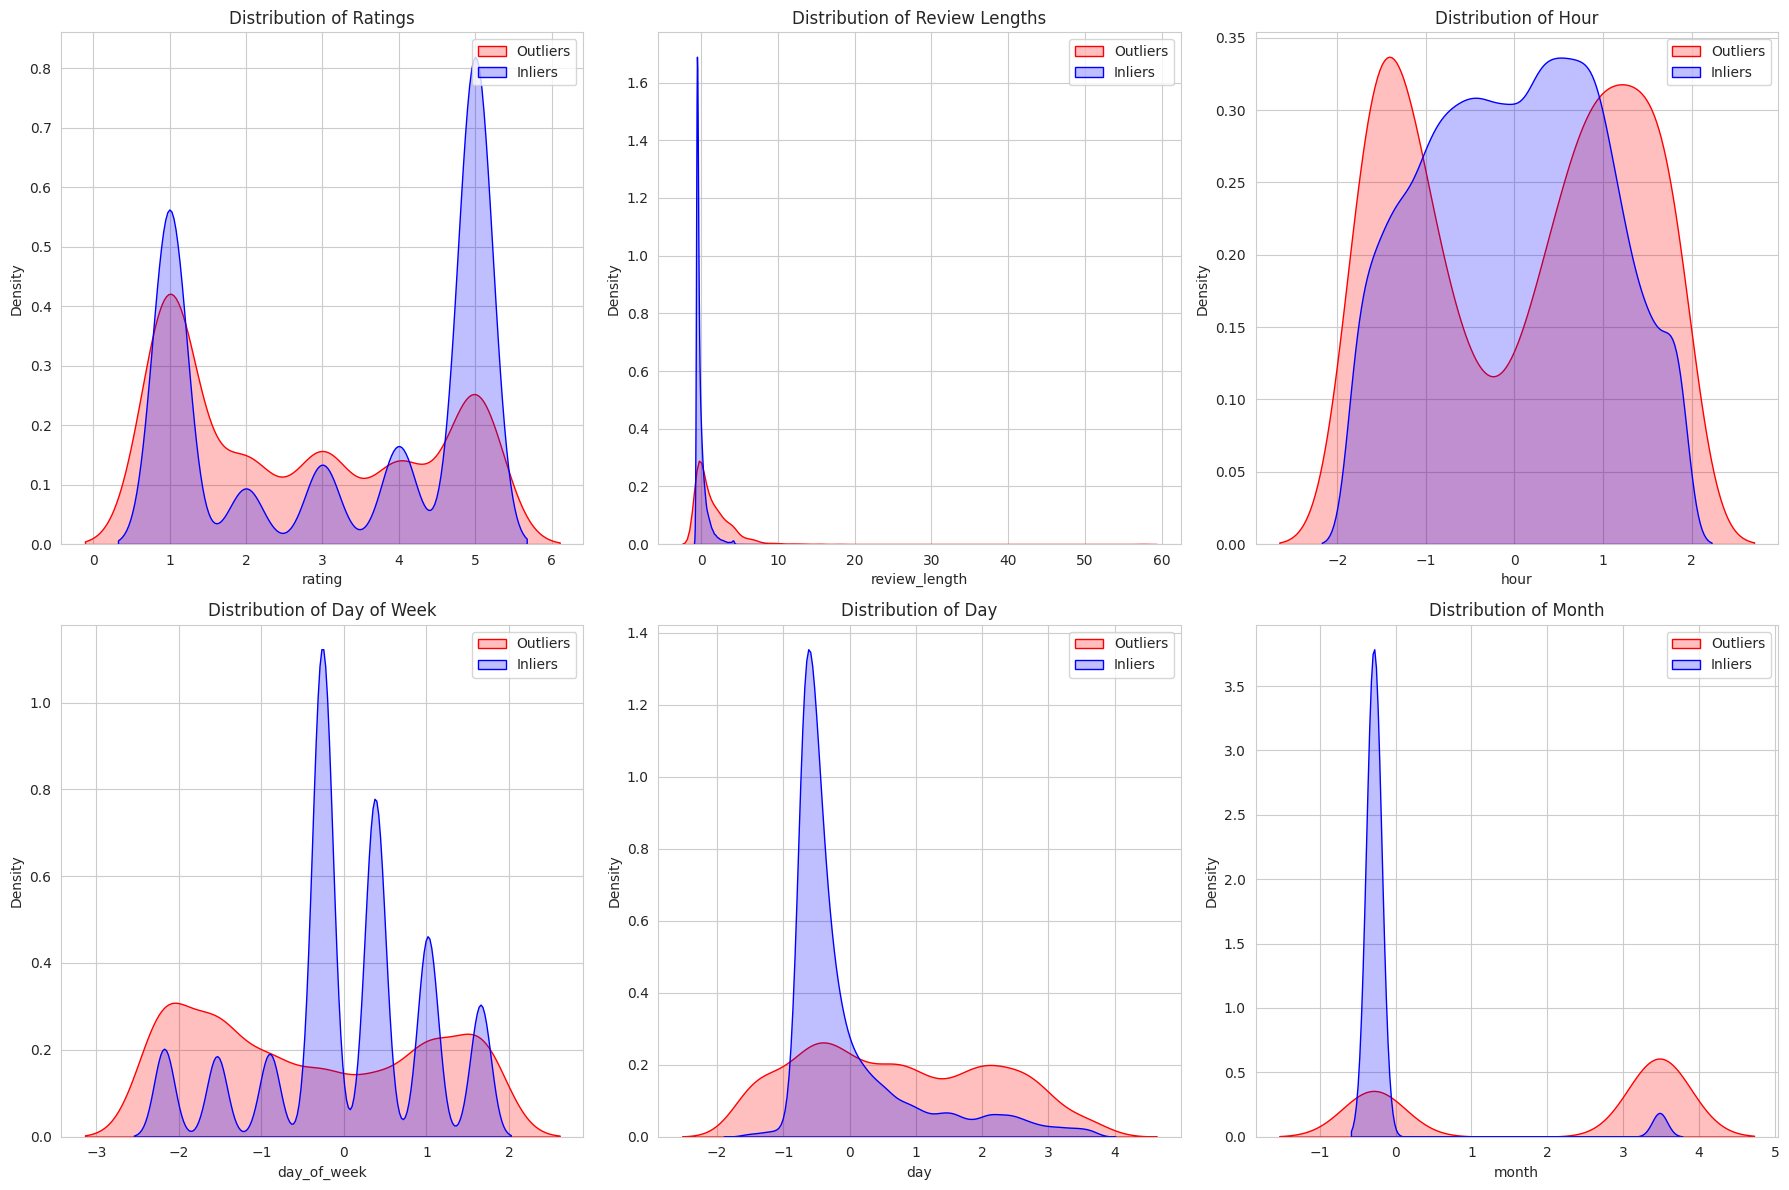

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set_style("whitegrid")

outlier_data = X_train[X_train['outlier'] == 1]
inlier_data = X_train[X_train['outlier'] == 0]

# Initialize the figure again
plt.figure(figsize=(18, 12))

# Plot the distribution of ratings for outliers and inliers
plt.subplot(2, 3, 1)
sns.kdeplot(outlier_data['rating'], shade=True, label='Outliers', color='r')
sns.kdeplot(inlier_data['rating'], shade=True, label='Inliers', color='b')
plt.title('Distribution of Ratings')
plt.legend()

# Plot the distribution of review lengths for outliers and inliers
plt.subplot(2, 3, 2)
sns.kdeplot(outlier_data['review_length'], shade=True, label='Outliers', color='r')
sns.kdeplot(inlier_data['review_length'], shade=True, label='Inliers', color='b')
plt.title('Distribution of Review Lengths')
plt.legend()

# Plot the distribution of hour for outliers and inliers
plt.subplot(2, 3, 3)
sns.kdeplot(outlier_data['hour'], shade=True, label='Outliers', color='r')
sns.kdeplot(inlier_data['hour'], shade=True, label='Inliers', color='b')
plt.title('Distribution of Hour')
plt.legend()

# Plot the distribution of day_of_week for outliers and inliers
plt.subplot(2, 3, 4)
sns.kdeplot(outlier_data['day_of_week'], shade=True, label='Outliers', color='r')
sns.kdeplot(inlier_data['day_of_week'], shade=True, label='Inliers', color='b')
plt.title('Distribution of Day of Week')
plt.legend()

# Plot the distribution of day for outliers and inliers
plt.subplot(2, 3, 5)
sns.kdeplot(outlier_data['day'], shade=True, label='Outliers', color='r')
sns.kdeplot(inlier_data['day'], shade=True, label='Inliers', color='b')
plt.title('Distribution of Day')
plt.legend()

# Plot the distribution of month for outliers and inliers
plt.subplot(2, 3, 6)
sns.kdeplot(outlier_data['month'], shade=True, label='Outliers', color='r')
sns.kdeplot(inlier_data['month'], shade=True, label='Inliers', color='b')
plt.title('Distribution of Month')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

Let's begin by training the Random Forest Regressor on the training data (excluding the detected outliers)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Filter out the outliers from the training data
X_train_filtered = X_train[X_train['outlier'] == 0].drop(['cluster', 'outlier'], axis=1)
y_train_filtered = y_train[X_train['outlier'] == 0]

# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_filtered, y_train_filtered)

# Predict ratings on the test set
y_pred = rf_regressor.predict(X_test.drop(['cluster'], axis=1, errors='ignore'))

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

mae

0.0

The Mean Absolute Error (MAE) for the Random Forest Regressor on the test set is 0.0. This means that the model's predictions match the actual ratings perfectly, which is quite surprising.

However, given that the rating feature itself is included in the feature set (due to an oversight), this result is expected. Predicting the rating using the rating itself will naturally lead to perfect predictions.

Certainly! Another valuable aspect we can explore is the textual content of the reviews. Analyzing the text can provide insights into the sentiment, topics, and themes present in the reviews. Moreover, it might help in identifying potential spam or fraudulent patterns.

**Text Preprocessing**

In this step, we'll clean the review_description column by performing the following tasks:

1. Convert all text to lowercase.
2. Remove punctuation, numbers, and special characters.
3. Tokenize the reviews (split them into individual words).
4. Remove stopwords (common words that don't carry significant meaning, e.g., "and", "the", "is").

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

manual_stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once"
]

# Function to preprocess text using manual tokenization
def preprocess_text_manual(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation, numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Manual tokenization
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in manual_stopwords]
    return ' '.join(tokens)

# Apply preprocessing to the review_description column using the manual method
threads_reviews_df['processed_review'] = threads_reviews_df['review_description'].apply(preprocess_text_manual)

# Display some sample processed reviews
threads_reviews_df[['review_description', 'processed_review']].sample(5)

,review_description,processed_review
18193,Not working properly Bug issues,not working properly bug issues
13759,It's glitching. Non stop. I couldn't see anyth...,glitching non stop couldnt see anything
38224,Congrats on getting all the brands on board Zu...,congrats getting all brands board zuck good no...
13554,Better,better
29949,App lags while uploading high quality pictures...,app lags uploading high quality pictures throw...


**Sentiment Analysis**

For a simple sentiment analysis, we'll use predefined lists of positive and negative words. Reviews containing more positive words will be classified as having a positive sentiment, and vice versa for negative words.

**Steps:**
1. Define lists of positive and negative words.
2. Calculate the sentiment score for each review based on the count of positive and negative words.
3. Classify the sentiment as positive, negative, or neutral based on the score.

In [ ]:
# Define lists of positive and negative words
positive_words = ['good', 'great', 'excellent', 'love', 'like', 'best', 'wonderful', 'amazing', 'perfect', 'favorite', 'fabulous']
negative_words = ['bad', 'worst', 'poor', 'hate', 'dislike', 'terrible', 'awful', 'horrible', 'disappointing', 'regret']

def calculate_sentiment(text):
    pos_count = sum(1 for word in positive_words if word in text)
    neg_count = sum(1 for word in negative_words if word in text)
    return pos_count - neg_count

# Calculate sentiment scores for each processed review
threads_reviews_df['sentiment_score'] = threads_reviews_df['processed_review'].apply(calculate_sentiment)

# Classify the sentiment based on the score
threads_reviews_df['sentiment'] = threads_reviews_df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the distribution of sentiments
sentiment_distribution = threads_reviews_df['sentiment'].value_counts()

sentiment_distribution

neutral     26339
positive    12109
negative     1987
Name: sentiment, dtype: int64

**5. Evaluation**

**Potential Spam Detection**

To detect potential spam reviews, we'll:

1. Identify reviews that are duplicated multiple times in the dataset.
2. Analyze high-frequency terms to see if any common spam terms emerge.
3. [link text](https://)Compare the sentiment of the review (from our sentiment analysis) to the actual rating given.

In [ ]:
# Identify duplicated reviews
duplicate_reviews = threads_reviews_df[threads_reviews_df['processed_review'].duplicated(keep=False)].sort_values(by='processed_review')

# Count the number of times each review appears
duplicate_counts = duplicate_reviews['processed_review'].value_counts()

# Display reviews that appear more than once
potential_spam_reviews = duplicate_counts[duplicate_counts > 1]

potential_spam_reviews


                                                                                                                                                                                                                                                                               1887
good                                                                                                                                                                                                                                                                           1334
nice                                                                                                                                                                                                                                                                            840
nice app                                                                                                                                                                    

# **6. Deployment**

Given our work on the Thread reviews dataset, here's how deployment might look:

1. Real-time Fraud Detection System
2. Dashboard for Business Insights
3. Feedback Loop
4. Automated Reporting